## Assignment 2 - Epipolar Geometry and 3D Reconstruction

First name: Marcel
<br>
Last name: Zauder
<br>
Matriculation number: 16-124-836

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from data import load_homogeneous_coordinates
from utils import eight_points_algorithm, right_epipole, plot_epipolar_line
from utils import get_normalization_matrix

## Part I: The Eight Point Algorithm

### Load Data

In [2]:
data_dir = './merton_college/'
img1, img2, x1, x2 = load_homogeneous_coordinates(data_dir)

### Compute Test Normalization Matrix

In [3]:
print(get_normalization_matrix(x1))

[[ 0.00458519  0.         -2.47824548]
 [ 0.          0.00458519 -1.16055738]
 [ 0.          0.          1.        ]]


### Estimate the fundamental matrix F

In [4]:
F = eight_points_algorithm(x1, x2) 
assert np.linalg.matrix_rank(F) == 2
print('Estimated fundamental matrix: ')
print(F)

Estimated fundamental matrix: 
[[-1.02865053e-09 -3.20313590e-07  1.31896763e-04]
 [ 9.73707906e-07  4.12485323e-08 -3.65986291e-03]
 [-4.04920255e-04  3.42996433e-03  1.43956698e-01]]


### Plot epipoles and epipolar lines

In [5]:
# compute the epipole
# TODO: implement this function
e = right_epipole(F)  

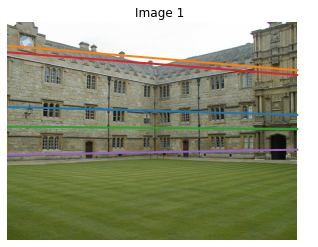

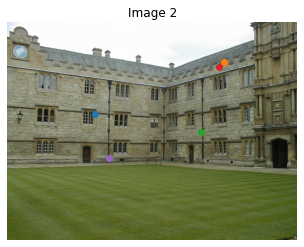

In [6]:
plt.figure()
plt.imshow(img1)
plt.title('Image 1')

# plot each line individually, this gives nice colors
for i in range(100, 105): 
    plot_epipolar_line(img1, F.T, x2[:, i], e)

plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.title('Image 2')

# plot each point individually, this gives same colors as the lines 
for i in range(100, 105):
    plt.plot(x2[0, i], x2[1, i], 'o')
    plt.axis('off')

In [7]:
%matplotlib notebook
from ipywidgets import *

fig, ax = plt.subplots()
ax.imshow(img1)

fig2, ax2 = plt.subplots()
ax2.imshow(img2)

def onclick(event):
    ax.plot(event.xdata, event.ydata, 'o')
    plot_epipolar_line(img2, F, np.array([event.xdata, event.ydata, 1]), e, ax2)
    ax2.imshow(img2)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>